In [111]:
import sigpy as sp
import sigpy.mri as mr
import sigpy.plot as pl
import numpy as np
# import cfl
import numpy as np
# import cupy as cp
%matplotlib notebook

In [112]:
import generate_nufft
import generate_input

In [113]:
import manifold_recon

In [137]:
data_spiral = np.load("ksp.npy")


In [139]:
data_X = np.zeros((1,1536,6,2))
data_X[0,:,:,0] = np.real(data_spiral)
data_X[0,:,:,1] = np.imag(data_spiral)

In [116]:
print(data_X[0,0,0,1])

0.0


In [117]:
Y_shape = np.zeros((1,64,64))

In [118]:
data_spiral.shape

(1536, 6)

In [158]:
#print(data_spiral)
recon = sp.nufft_adjoint(dcf*data_spiral, coord_1,oshape=[64,64])
# data_X = data_X/np.max(abs(recon))
recon = recon/np.max(abs(recon))

In [105]:
print(np.max(recon))

(0.9999999999988138-1.540244358955717e-06j)


<IPython.core.display.Javascript object>


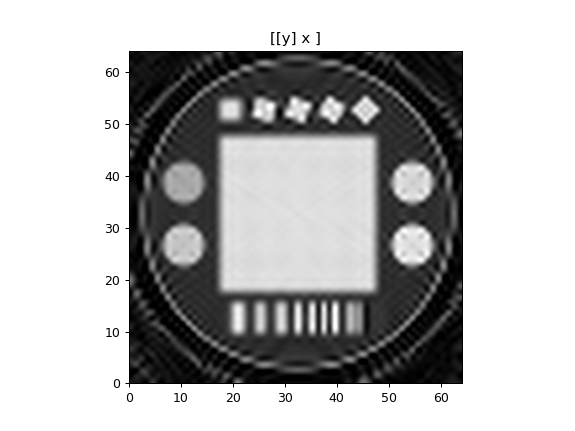

In [154]:
pl.ImagePlot(recon)

In [159]:
nufft = sp.nufft(recon, coord) #nufft
x = np.dstack((nufft.real, nufft.imag))
x = np.expand_dims(x, axis=0)

In [42]:
x.shape

(1, 1536, 6, 2)

In [19]:
print(X_train)

[[[[ 2.33690917e+01  6.93889390e-18]
   [ 2.33690917e+01  6.93889390e-18]
   [ 2.33690917e+01  6.93889390e-18]
   [ 2.33690917e+01  6.93889390e-18]
   [ 2.33690917e+01  6.93889390e-18]
   [ 2.33690917e+01  6.93889390e-18]]

  [[ 2.32662276e+01  2.16244372e-01]
   [ 2.32218926e+01 -3.22144549e-01]
   [ 2.32158824e+01 -5.26796362e-01]
   [ 2.32662276e+01 -2.16244372e-01]
   [ 2.32218926e+01  3.22144549e-01]
   [ 2.32158824e+01  5.26796362e-01]]

  [[ 2.28363346e+01  4.85625636e-01]
   [ 2.27765368e+01 -1.24619992e+00]
   [ 2.27322811e+01 -1.70074654e+00]
   [ 2.28363346e+01 -4.85625636e-01]
   [ 2.27765368e+01  1.24619992e+00]
   [ 2.27322811e+01  1.70074654e+00]]

  ...

  [[-4.90423105e-02 -2.29159624e-03]
   [ 3.67509031e-02  9.39621777e-03]
   [ 1.62574376e-02 -8.42240437e-02]
   [-4.90423105e-02  2.29159624e-03]
   [ 3.67509031e-02 -9.39621777e-03]
   [ 1.62574376e-02  8.42240437e-02]]

  [[-9.16239907e-04  1.93316910e-02]
   [ 5.43811714e-02  6.41710378e-03]
   [-1.73675000e-01 -5.

In [12]:
dcf = np.load("dcf.npy")

In [138]:
coord_1 = np.load('coord.npy')

coord = coord_1*32/np.max(coord_1)


In [125]:
X_test,Y_test = generate_nufft.load_images_from_folder('image_real/',5,coord,normalize=False,imrotate=True)

In [131]:
recon = sp.nufft_adjoint(dcf*(X_test[:,:,:,0]+1j*X_test[:,:,:,1]), coord)

<IPython.core.display.Javascript object>


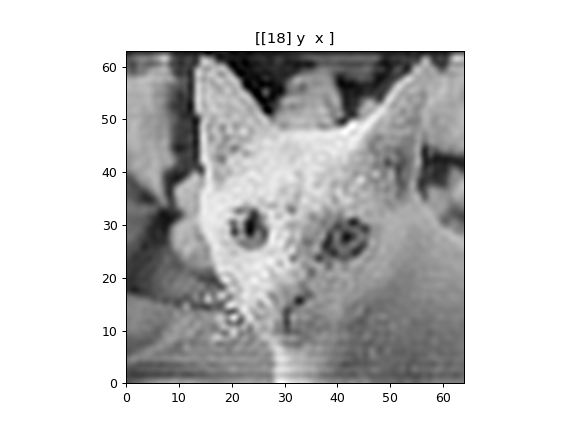

In [132]:
pl.ImagePlot(recon)

<IPython.core.display.Javascript object>


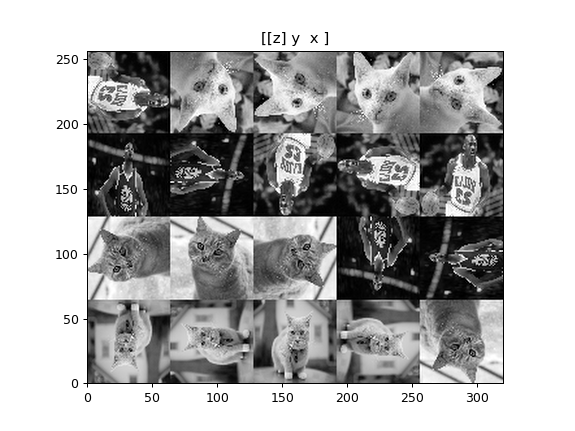

In [126]:
pl.ImagePlot(Y_test)

<IPython.core.display.Javascript object>


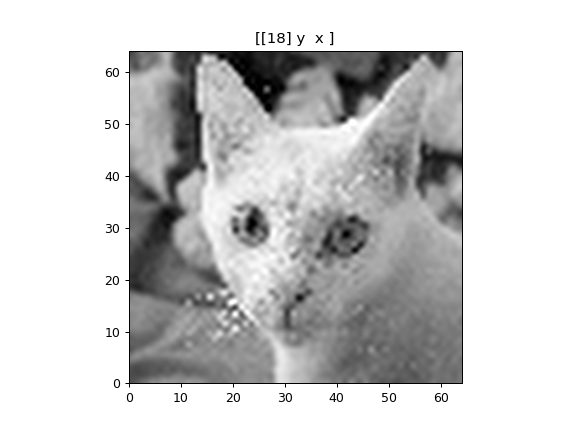

In [127]:
pl.ImagePlot(Y_test)

In [135]:
Y_forward = manifold_recon.forward_model(X_test, np.zeros(Y_test.shape),"model_t/model_maniflod_spiral.ckpt")

INFO:tensorflow:Restoring parameters from model_t/model_maniflod_spiral.ckpt
Model restored


<IPython.core.display.Javascript object>


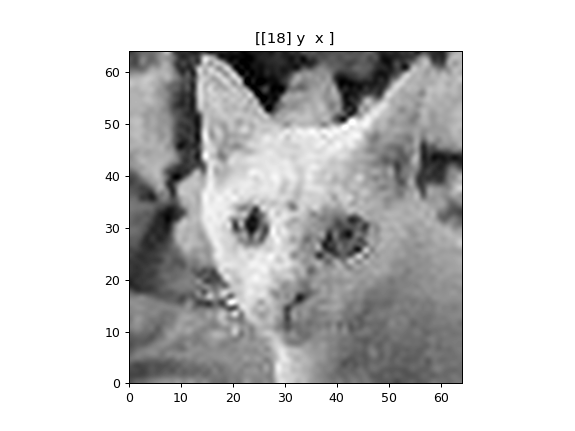

In [136]:
pl.ImagePlot(Y_forward)

In [43]:
data_X.shape

(1, 1536, 6, 2)

In [160]:
Y_test = manifold_recon.forward_model(x, Y_shape,"model_t/model_maniflod_spiral.ckpt")

INFO:tensorflow:Restoring parameters from model_t/model_maniflod_spiral.ckpt
Model restored


<IPython.core.display.Javascript object>


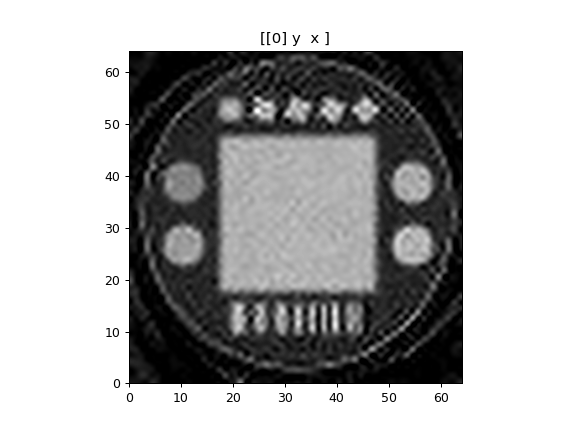

In [161]:
pl.ImagePlot(Y_test)

In [37]:
sp.nufft

<module 'sigpy.nufft' from '/home/kewang/sparse_coding/sigpy/sigpy/nufft.py'>

In [25]:
data_man = np.load('data_spiral.npy')

<IPython.core.display.Javascript object>


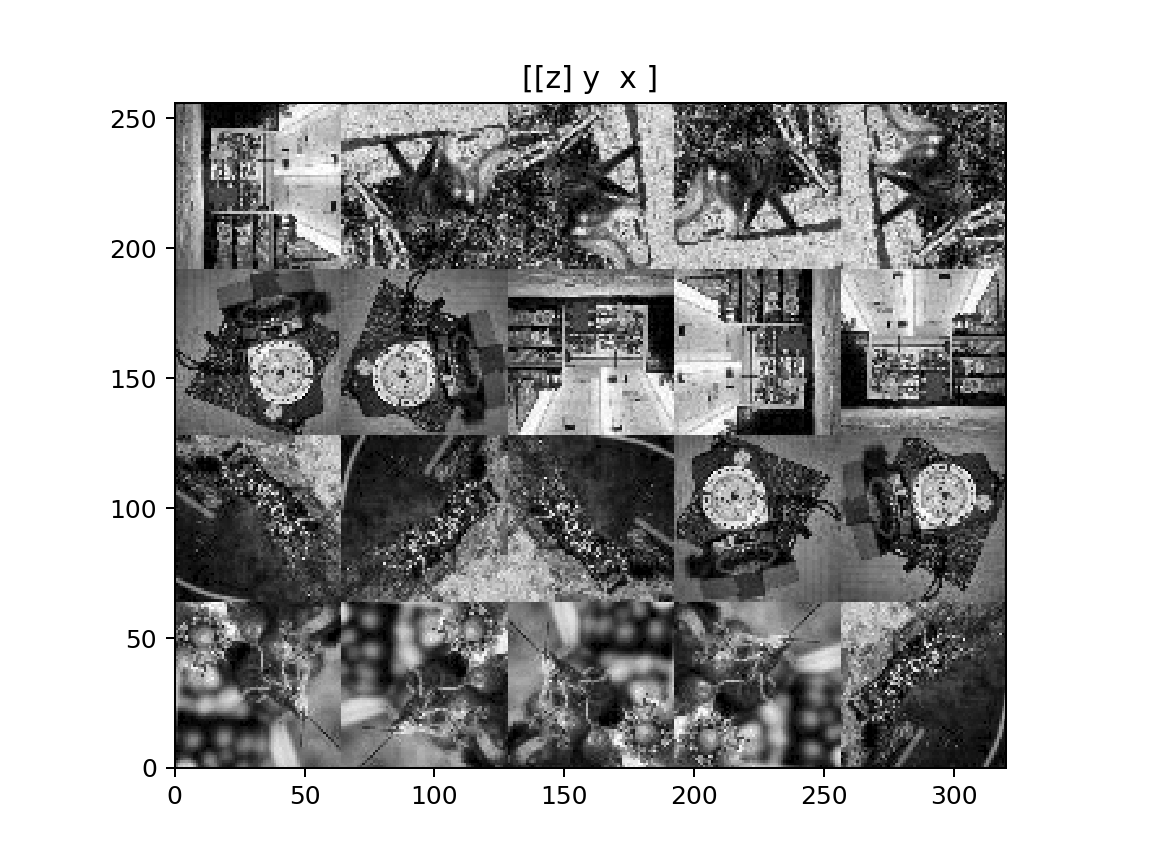

In [26]:
pl.Image(data_man)

In [27]:
import generate_input
import math
import generate_nufft

In [34]:
coord = np.load('coord.npy')

In [35]:
coord = coord*32/np.max(coord)

In [86]:
X_train,Y_train = generate_nufft.load_images_from_folder('images/',5,coord,normalize=False,imrotate=True)

In [9]:
def random_mini_batches(x, y, mini_batch_size=64, seed=0):
    """ Shuffles training examples and partitions them into mini-batches
    to speed up the gradient descent
    :param x: input frequency space data
    :param y: input image space data
    :param mini_batch_size: mini-batch size
    :param seed: can be chosen to keep the random choice consistent
    :return: a mini-batch of size mini_batch_size of training examples
    """

    m = x.shape[0]  # number of input images
    mini_batches = []
    np.random.seed(seed)

    # Shuffle (x, y)
    permutation = list(np.random.permutation(m))
    shuffled_X = x[permutation, :]
    shuffled_Y = y[permutation, :]

    # Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = int(math.floor(
        m / mini_batch_size))  # number of mini batches of size mini_batch_size

    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size:k * mini_batch_size
                                    + mini_batch_size, :, :, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size:k * mini_batch_size
                                    + mini_batch_size, :, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches
                                  * mini_batch_size: m, :, :, :]
        mini_batch_Y = shuffled_Y[num_complete_minibatches
                                  * mini_batch_size: m, :, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

In [10]:
xx =random_mini_batches(X_train, Y_train, mini_batch_size=2, seed=0)

In [12]:
a = xx[0]

In [27]:
x = a[0]

<IPython.core.display.Javascript object>


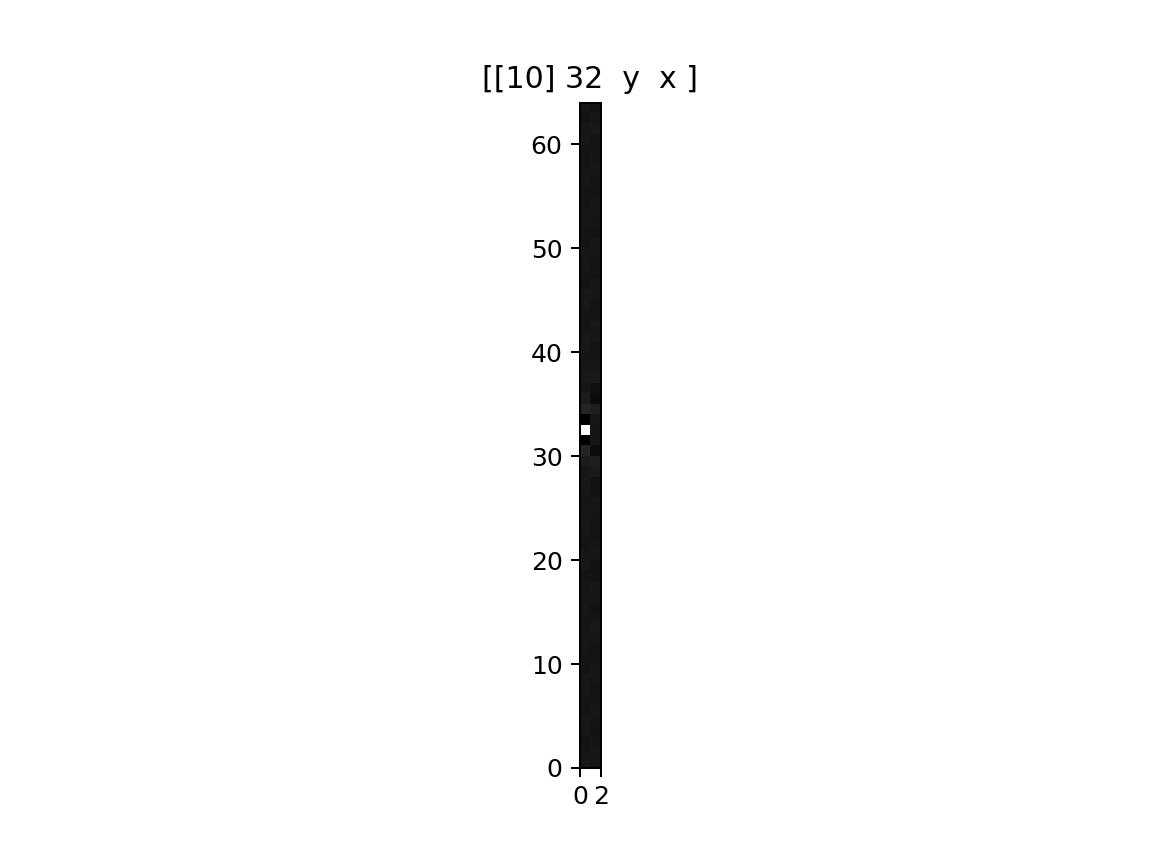

In [13]:
y = a[1]
pl.Image(X_train)

<IPython.core.display.Javascript object>


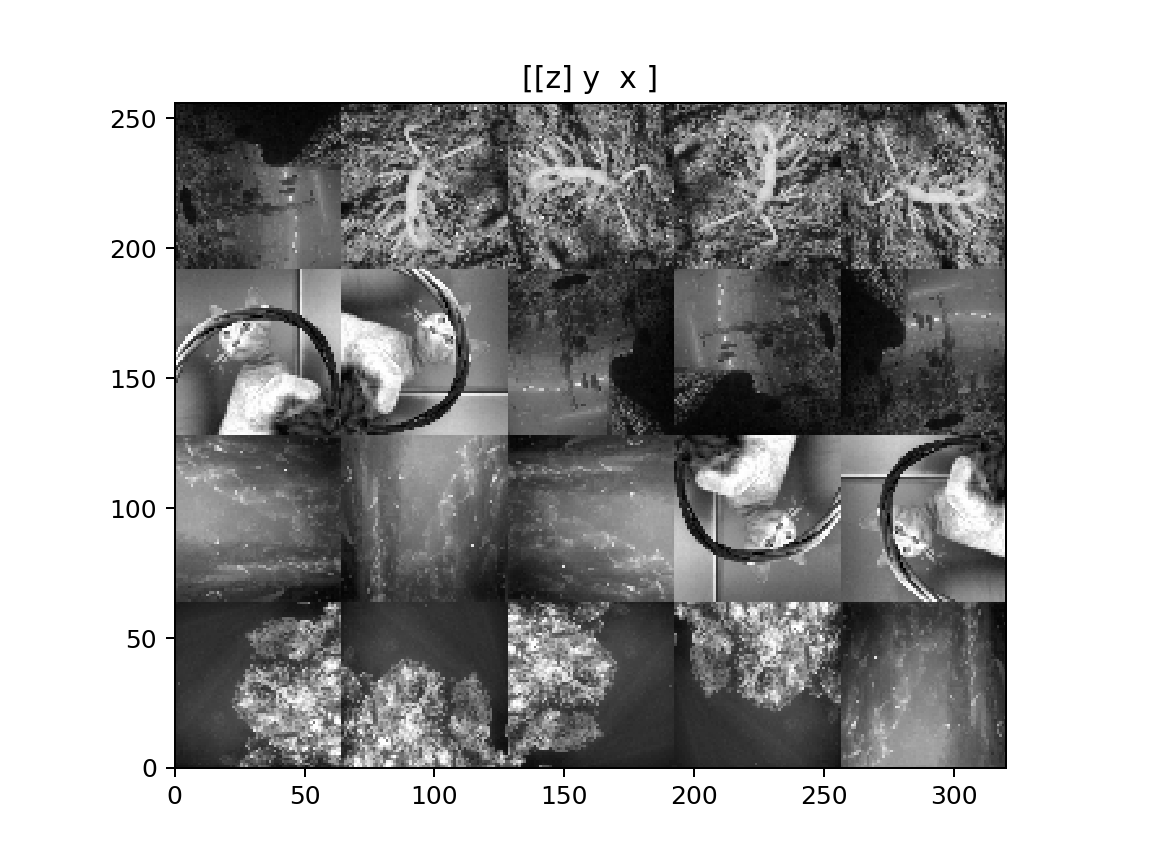

In [15]:
pl.Image(Y_train)